# Charles Leclerc

<img src="https://www.formula1.com/content/fom-website/en/drivers/charles-leclerc/_jcr_content/image.img.1920.medium.jpg/1646818893219.jpg" width="300">

### Team: Red Bull Racing

<img src ="https://www.formula1.com/content/fom-website/en/drivers/charles-leclerc/_jcr_content/helmet.img.png/1646824728203.png" width="200">




In [11]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

In [12]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [5]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

lec_laps <- lap_data %>%
            filter(driverId == 844)

# Season Analysis

In [50]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

rmse_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5673142,94.55237,1.575873


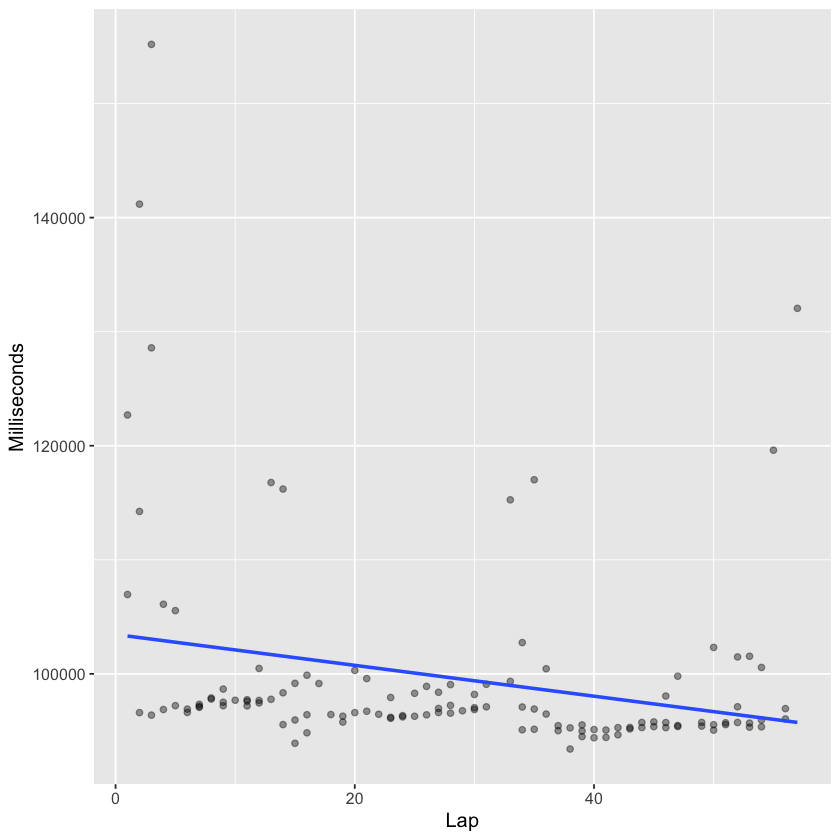

In [51]:
#1. Bahrain 

cl_bahrain <- lec_laps %>%
                filter(raceId %in% bahrain_race_ID) 

cl_bahrain_clean <- cl_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>% 
                        filter(raceId != 1045)

cl_bahrain_clean_ID <- cl_bahrain_clean %>%
                        pull(raceId)


 ### SPLITTING DATA

cl_bahrain_races <- lec_laps %>%
                    filter(raceId %in% cl_bahrain_clean_ID)

formulaone_split <- initial_split(cl_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

raceId,n
<dbl>,<int>
1042,66
1054,66


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5581049,93.01748,1.550291


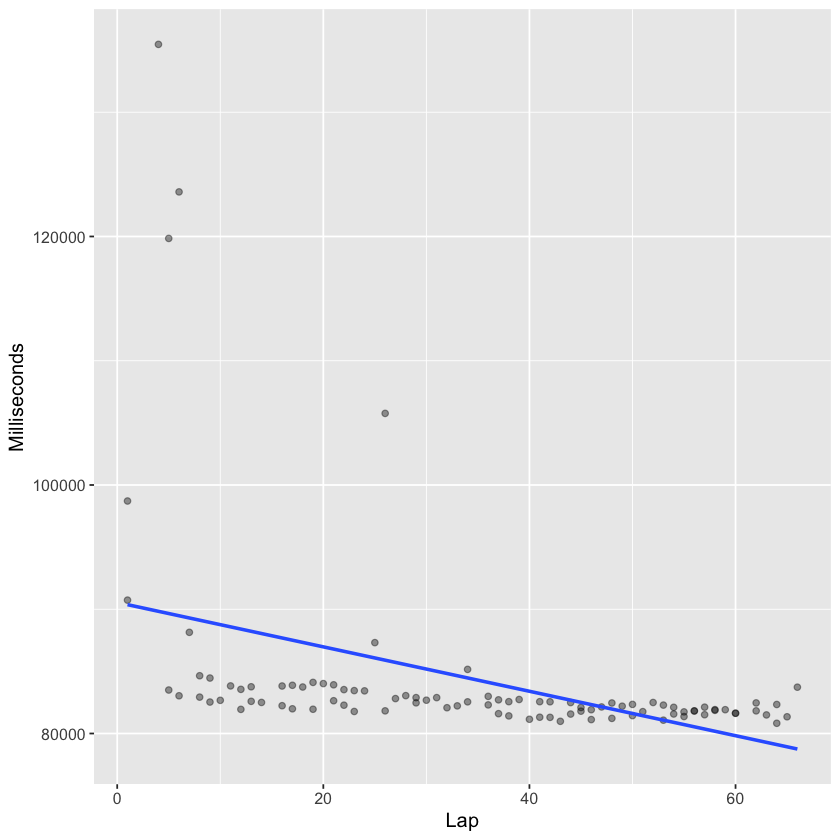

In [52]:
#2. Portimão

cl_Portimão <- lec_laps %>%
                filter(raceId %in% Portimão_race_ID) 

cl_Portimão_clean <- cl_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cl_Portimão_clean
cl_Portimão_clean_ID <- cl_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_Portimão_races <- lec_laps %>%
                    filter(raceId %in% cl_Portimão_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cl_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5302038,88.36731,1.472788


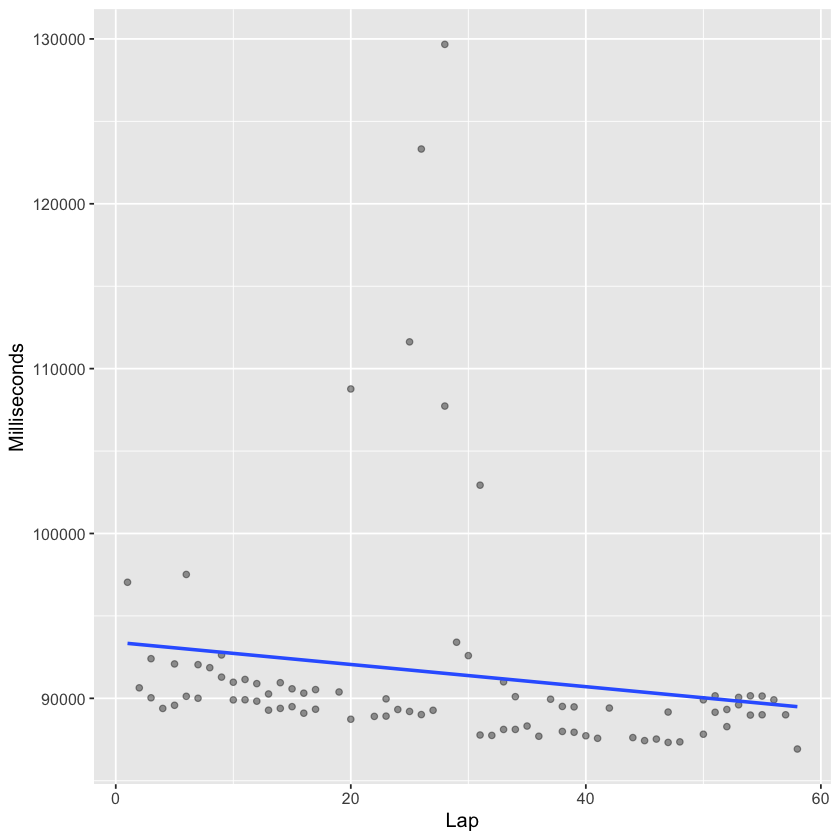

In [53]:
######################################################  Australia 

cl_aus <- lec_laps %>%
                filter(raceId %in% aus_race_ID) 

cl_aus_clean <- cl_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_aus_clean_ID <- cl_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_aus_races <- lec_laps %>%
                    filter(raceId %in% cl_aus_clean_ID)

formulaone_split <- initial_split(cl_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6680588,111.3431,1.855719


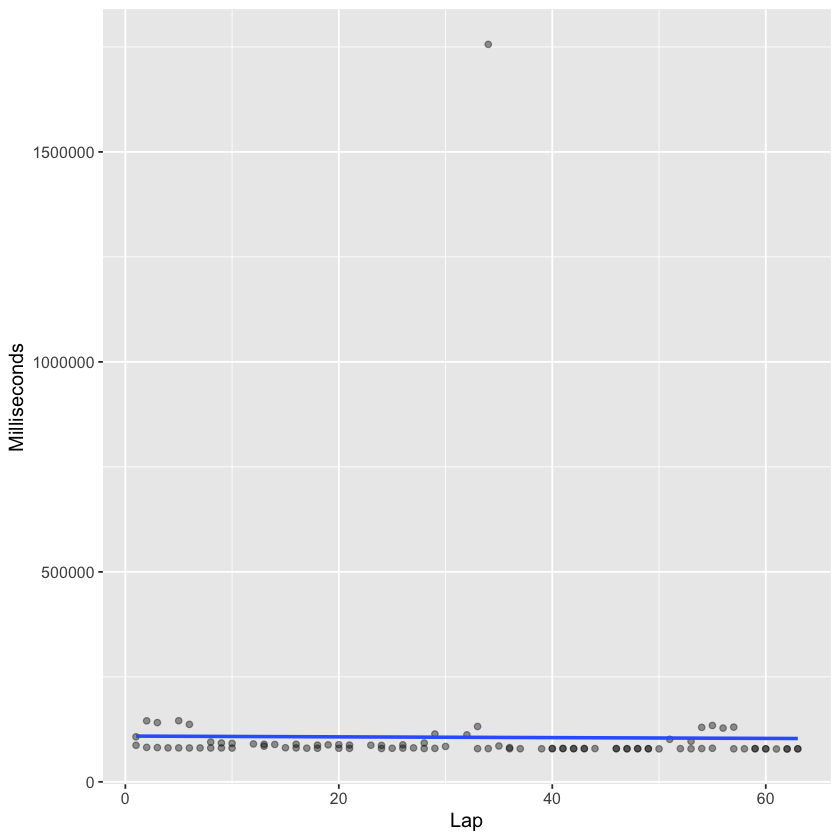

In [54]:
#4. Italy - Imola

cl_imola <- lec_laps %>%
                filter(raceId %in% imola_race_ID) 

cl_imola_clean <- cl_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_imola_clean_ID <- cl_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_imola_races <- lec_laps %>%
                    filter(raceId %in% cl_imola_clean_ID)

formulaone_split <- initial_split(cl_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse()

### GETS PREDICTION

get_imola_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5751613,95.86021,1.59767


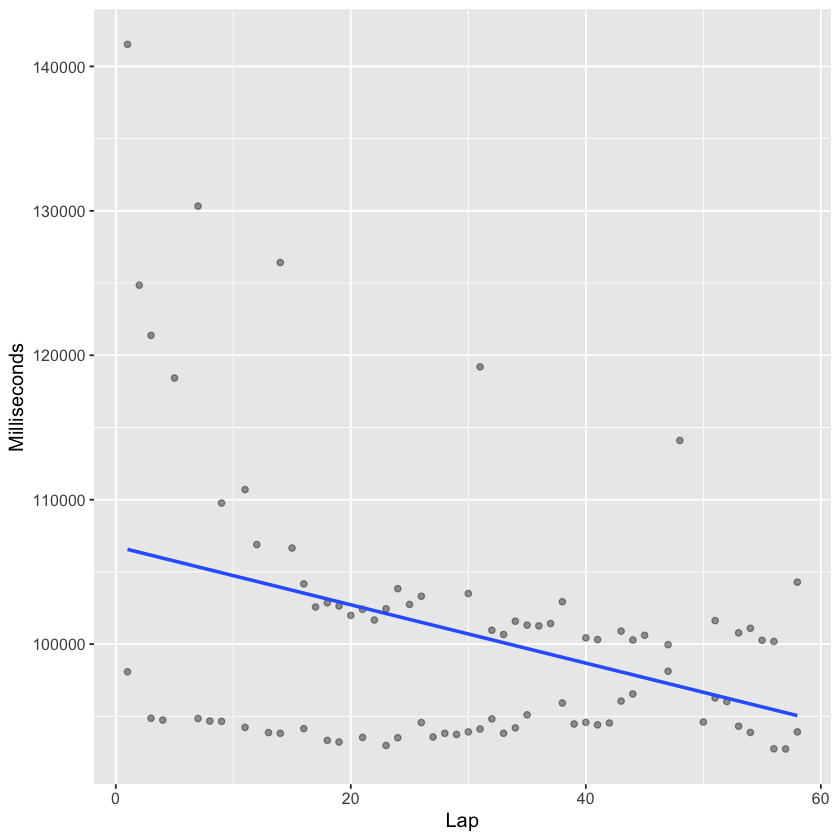

In [55]:
#5. Turkey (Replacing Miami)

cl_turkey <- lec_laps %>%
                filter(raceId %in% turkey_race_ID) 

cl_turkey_clean <- cl_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_turkey_clean_ID <- cl_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_turkey_races <- lec_laps %>%
                    filter(raceId %in% cl_turkey_clean_ID)

formulaone_split <- initial_split(cl_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse()

### GETS PREDICTION

get_miami_prediction()

raceId,n
<dbl>,<int>
1014,66
1055,66
993,64


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5806123,96.76871,1.612812


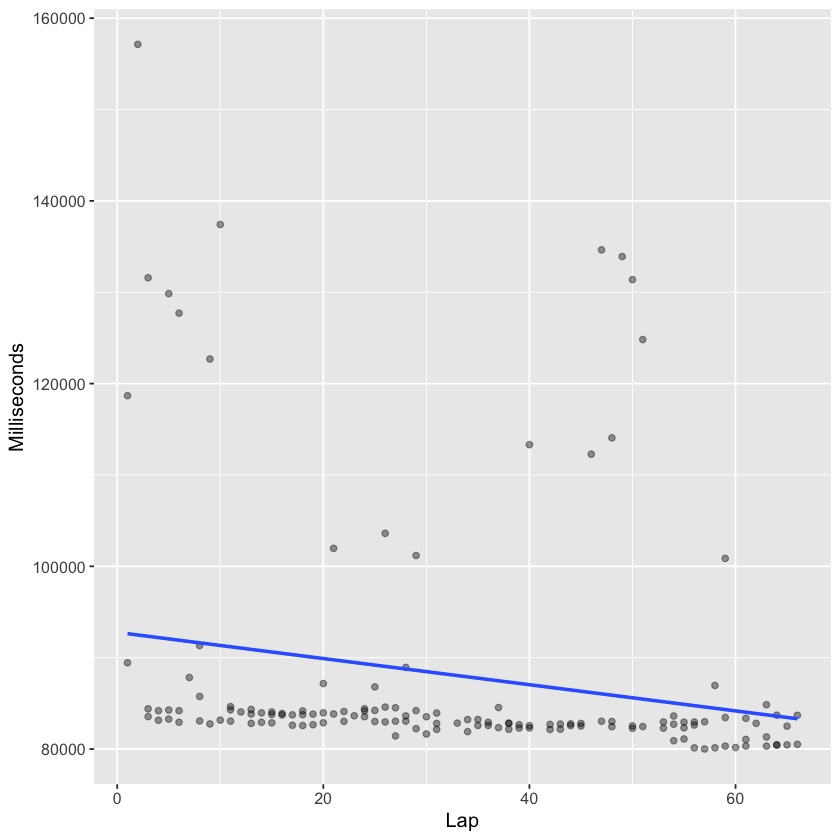

In [56]:
#6. Spain

cl_spain <- lec_laps %>%
                filter(raceId %in% spain_race_ID) 

cl_spain_clean <- cl_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>% 
                        filter(n != 38)
cl_spain_clean

cl_spain_clean_ID <- cl_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_spain_races <- lec_laps %>%
                    filter(raceId %in% cl_spain_clean_ID)

formulaone_split <- initial_split(cl_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse()

### GETS PREDICTION

get_spain_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6211492,103.5249,1.725414


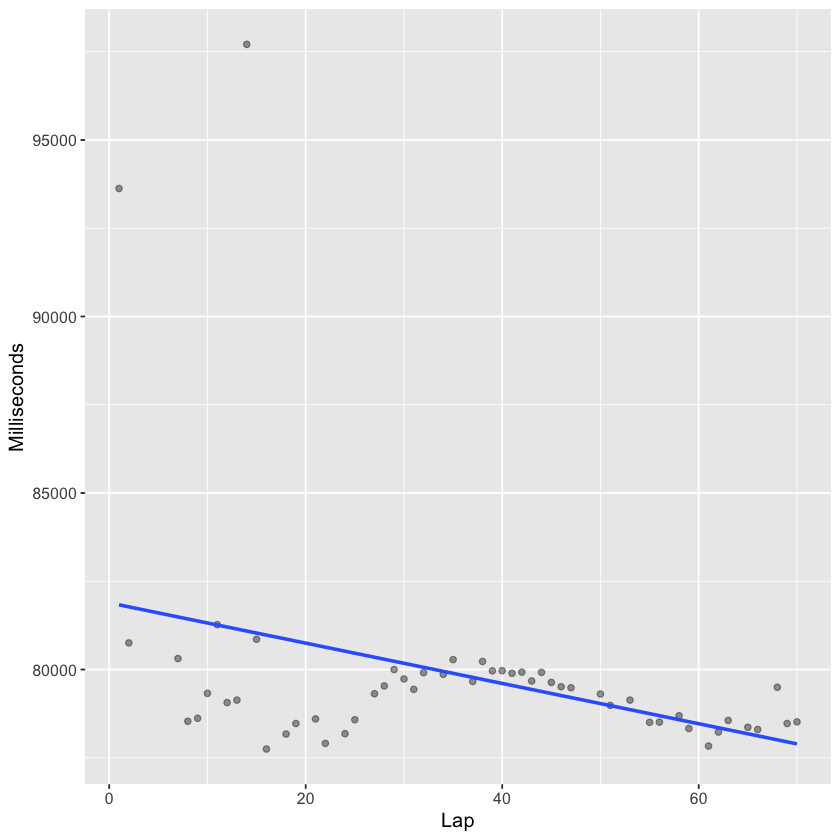

In [57]:
#7. Monaco

cl_monaco <- lec_laps %>%
                filter(raceId %in% monaco_race_ID) 

cl_monaco_clean <- cl_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>% 
                        filter(n != 16)

cl_monaco_clean_ID <- cl_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_monaco_races <- lec_laps %>%
                    filter(raceId %in% cl_monaco_clean_ID)

formulaone_split <- initial_split(cl_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse()

### GETS PREDICTION

get_monaco_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5881198,98.01997,1.633666


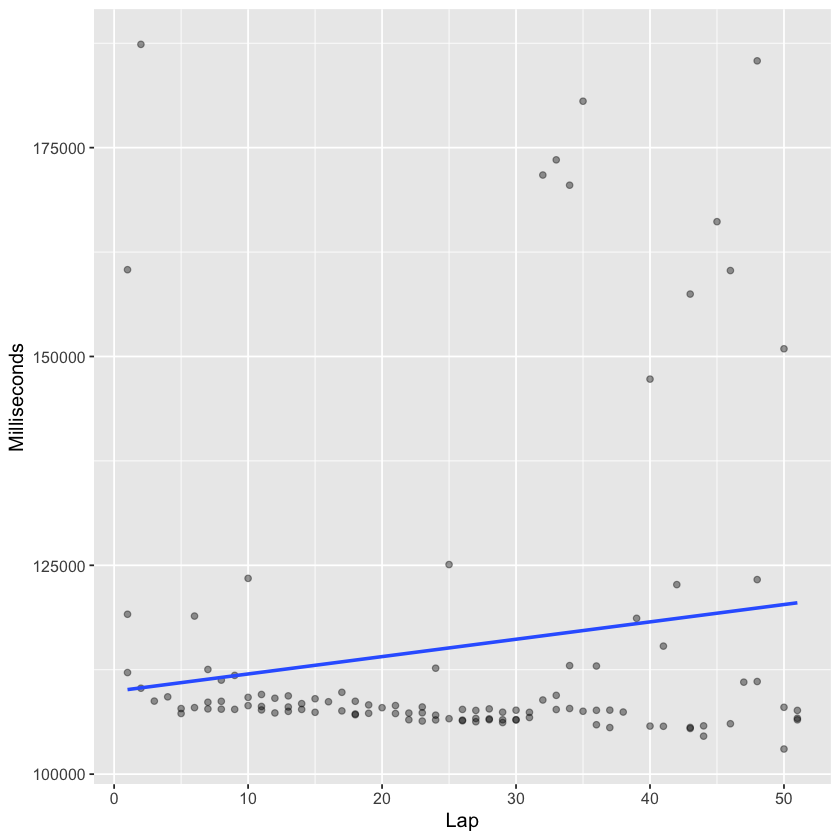

In [58]:
#8. Azerbaijan

cl_azerbaijan <- lec_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

cl_azerbaijan_clean <- cl_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_azerbaijan_clean_ID <- cl_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_azerbaijan_races <- lec_laps %>%
                    filter(raceId %in% cl_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cl_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse()

### GETS PREDICTION

get_azerbaijan_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5480524,91.34207,1.522368


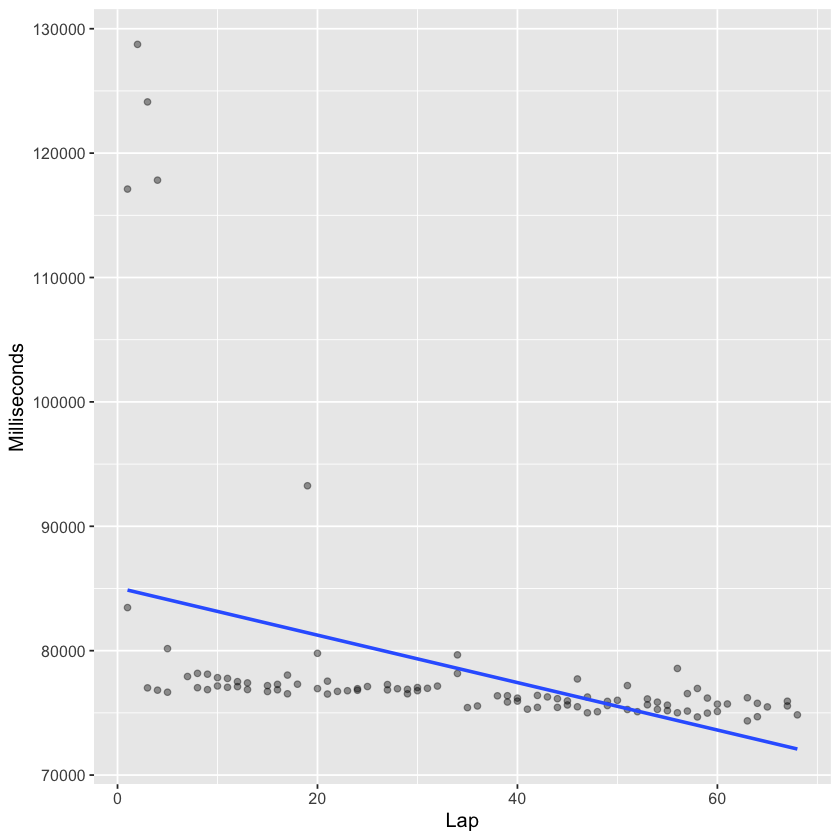

In [59]:
#9. Canada

cl_canada <- lec_laps %>%
                filter(raceId %in% canada_race_ID) 

cl_canada_clean <- cl_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_canada_clean_ID <- cl_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_canada_races <- lec_laps %>%
                    filter(raceId %in% cl_canada_clean_ID)

formulaone_split <- initial_split(cl_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse()

### GETS PREDICTION

get_canada_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4991253,83.18754,1.386459


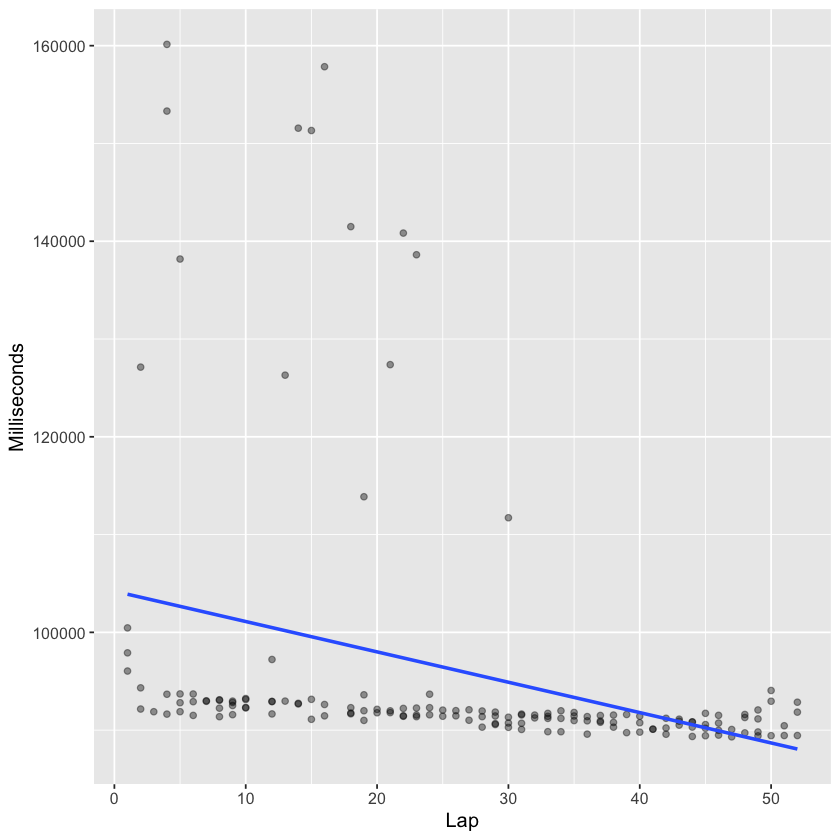

In [60]:
#10. UK

cl_uk <- lec_laps %>%
                filter(raceId %in% uk_race_ID) 

cl_uk_clean <- cl_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 18)

cl_uk_clean_ID <- cl_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_uk_races <- lec_laps %>%
                    filter(raceId %in% cl_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cl_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse()

### GETS PREDICTION

get_uk_prediction()

raceId,n
<dbl>,<int>
1018,71
1031,71
1060,71
997,70
1058,70


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5081147,84.68578,1.41143


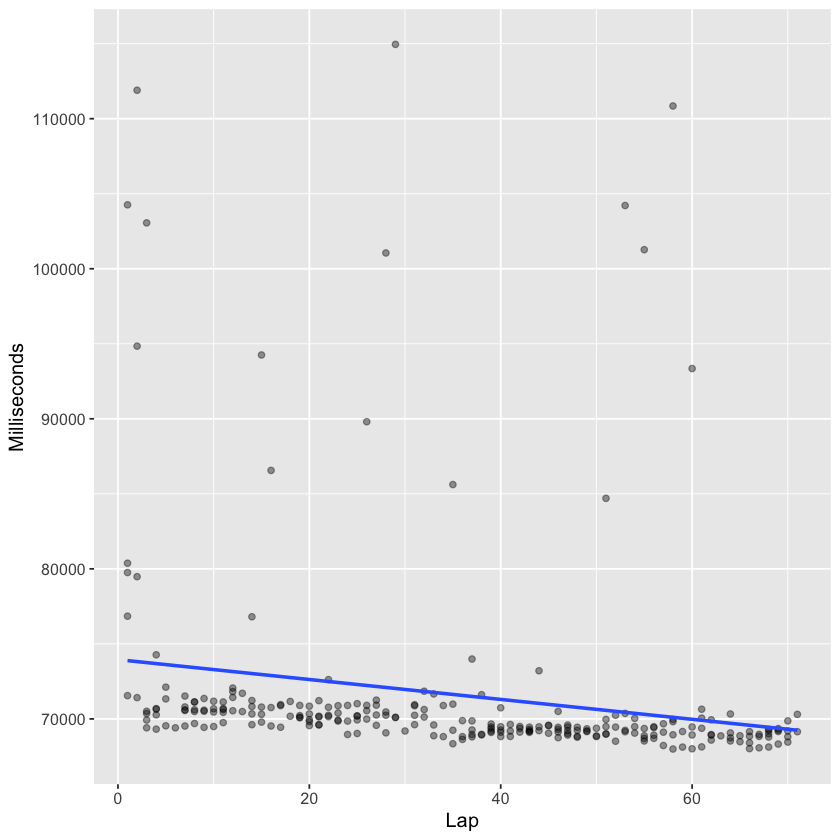

In [61]:
#11. Austria

cl_austria <- lec_laps %>%
                filter(raceId %in% austria_race_ID) 

cl_austria_clean <- cl_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter (n != 4)
cl_austria_clean

cl_austria_clean_ID <- cl_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_austria_races <- lec_laps %>%
                    filter(raceId %in% cl_austria_clean_ID)

formulaone_split <- initial_split(cl_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse()

### GETS PREDICTION

get_austria_prediction()

raceId,n
<dbl>,<int>
996,53
1017,53
1059,52


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5335930,88.93217,1.482203


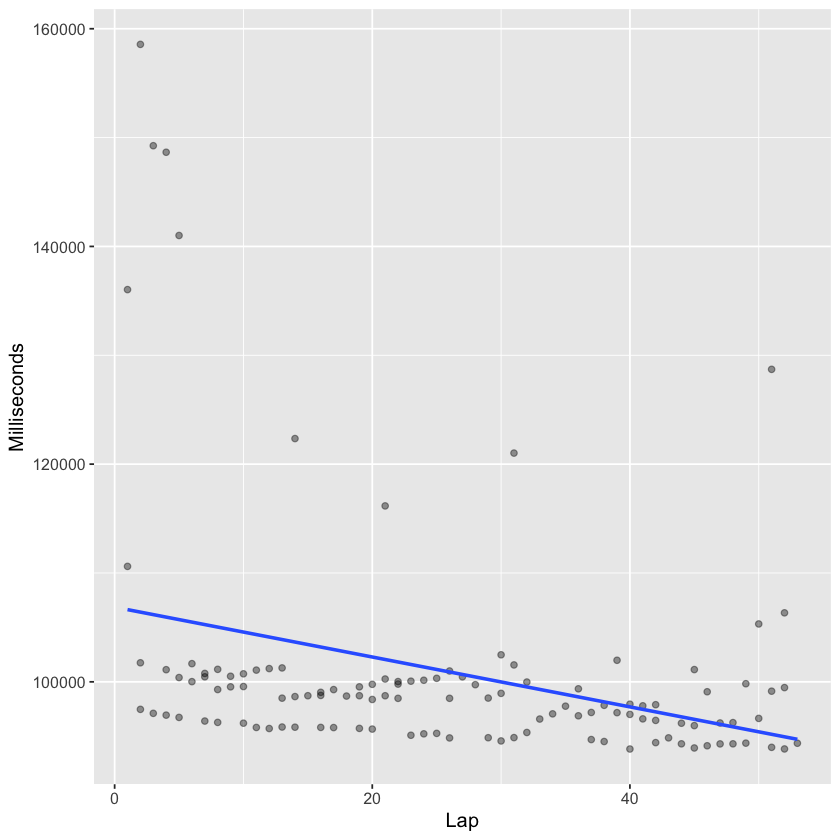

In [62]:
#12. France

cl_france <- lec_laps %>%
                filter(raceId %in% france_race_ID) 

cl_france_clean <- cl_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cl_france_clean
cl_france_clean_ID <- cl_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_france_races <- lec_laps %>%
                    filter(raceId %in% cl_france_clean_ID)

formulaone_split <- initial_split(cl_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse()

### GETS PREDICTION

get_france_prediction()

raceId,n
<dbl>,<int>
1021,70
1033,69


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5829533,97.15888,1.619315


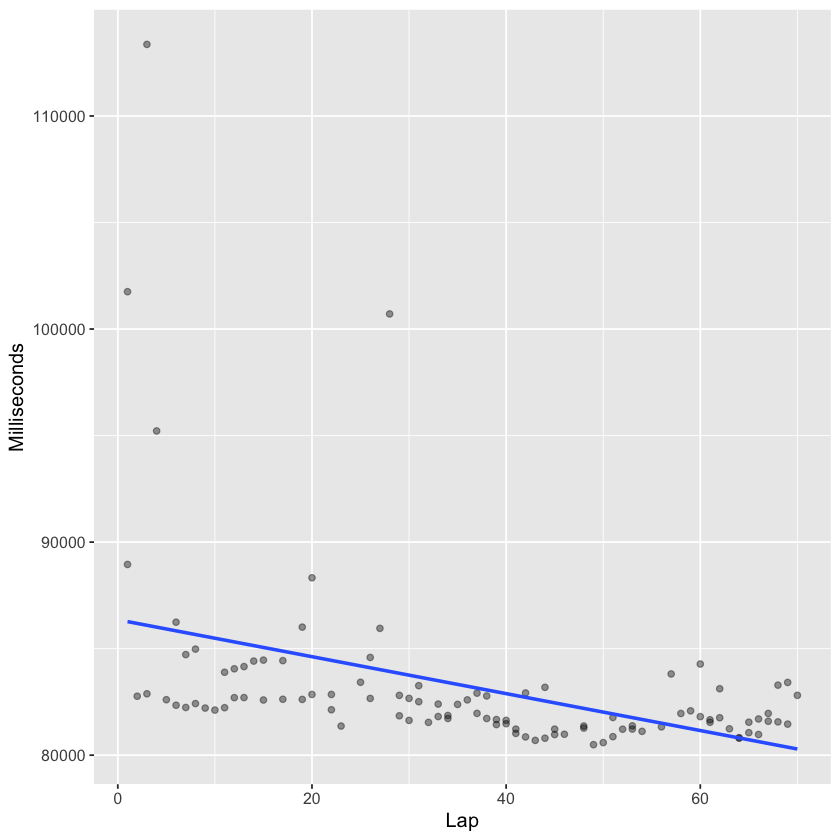

In [63]:
#13. Hungary

cl_hungary <- lec_laps %>%
                filter(raceId %in% hungary_race_ID) 

cl_hungary_clean <- cl_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cl_hungary_clean
cl_hungary_clean_ID <- cl_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_hungary_races <- lec_laps %>%
                    filter(raceId %in% cl_hungary_clean_ID)

formulaone_split <- initial_split(cl_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse()

### GETS PREDICTION

get_hungary_prediction()

raceId,n
<dbl>,<int>
1022,44
1037,44


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5027935,83.79891,1.396649


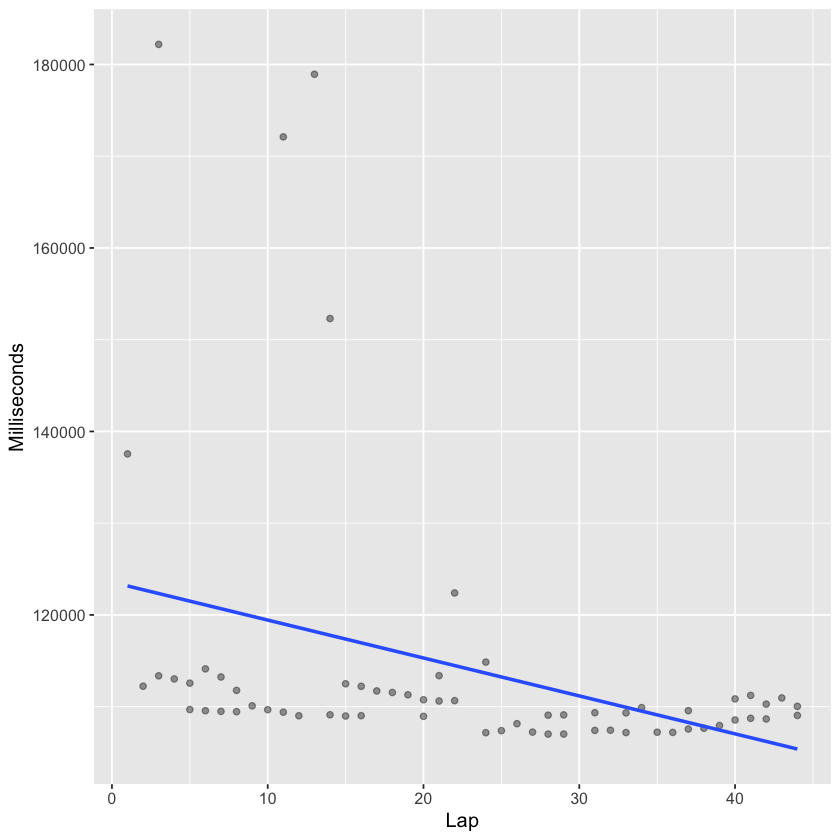

In [64]:
#14. Belgium

cl_belgium <- lec_laps %>%
                filter(raceId %in% belgium_race_ID) 

cl_belgium_clean <- cl_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>% 
                        filter(n != 1)
cl_belgium_clean

cl_belgium_clean_ID <- cl_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_belgium_races <- lec_laps %>%
                    filter(raceId %in% cl_belgium_clean_ID)

formulaone_split <- initial_split(cl_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse()

### GETS PREDICTION

get_belgium_prediction()

raceId,n
<dbl>,<int>
1064,71


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5494093,91.56821,1.526137


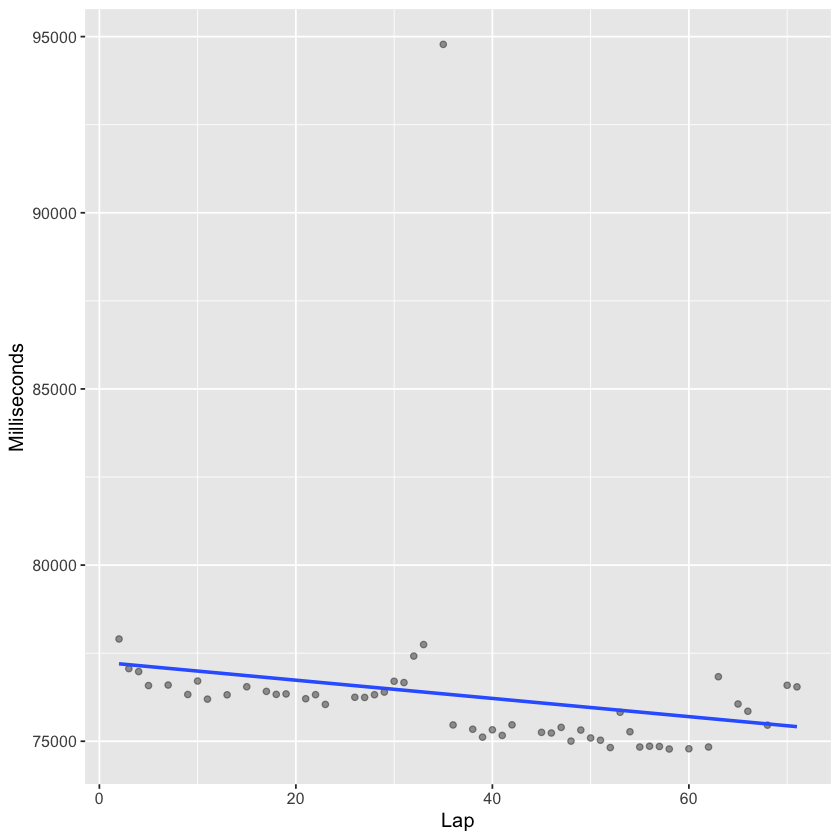

In [65]:
#15. Netherlands

cl_netherlands <- lec_laps %>%
                filter(raceId %in% netherlands_race_ID) 

cl_netherlands_clean <- cl_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cl_netherlands_clean
cl_netherlands_clean_ID <- cl_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_netherlands_races <- lec_laps %>%
                    filter(raceId %in% cl_netherlands_clean_ID)

formulaone_split <- initial_split(cl_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse()

### GETS PREDICTION

get_netherlands_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4731066,78.8511,1.314185


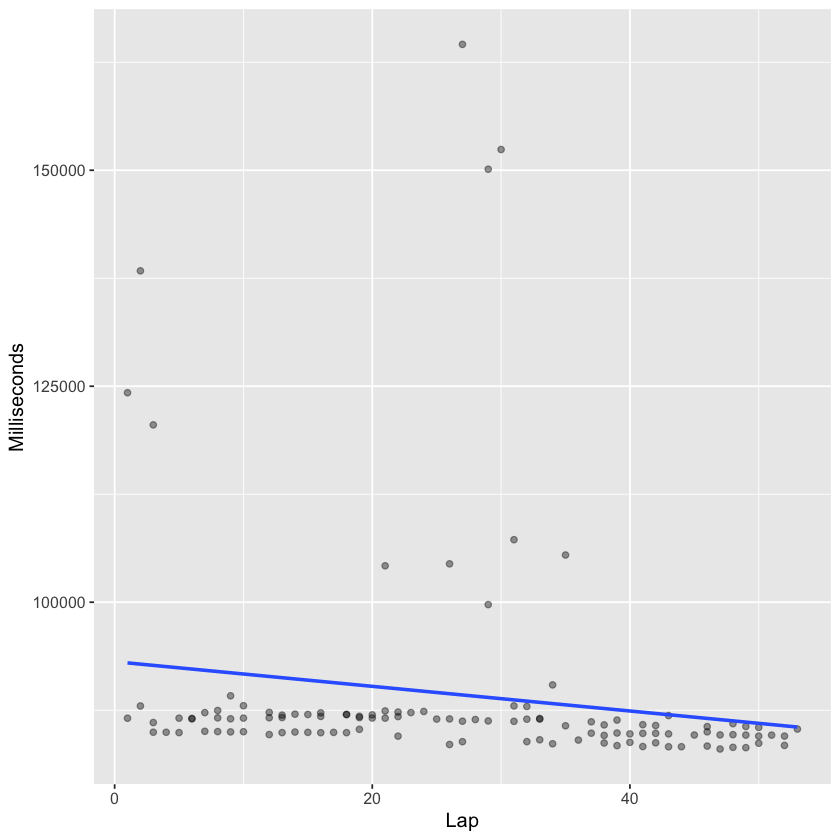

In [66]:
#16. Italy - Monza

cl_monza <- lec_laps %>%
                filter(raceId %in% monza_race_ID) 

cl_monza_clean <- cl_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 23)

cl_monza_clean_ID <- cl_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_monza_races <- lec_laps %>%
                    filter(raceId %in% cl_monza_clean_ID)

formulaone_split <- initial_split(cl_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse()

### GETS PREDICTION

get_monza_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6861990,114.3665,1.906108


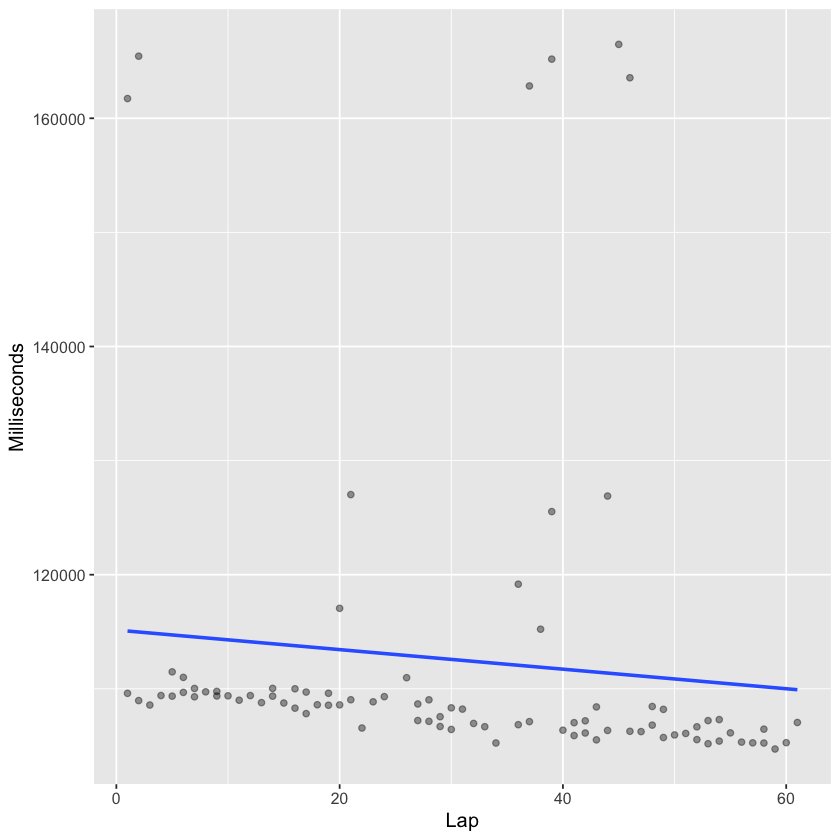

In [67]:
#17. Singapore

cl_singapore <- lec_laps %>%
                filter(raceId %in% singapore_race_ID) 

cl_singapore_clean <- cl_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_singapore_clean_ID <- cl_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_singapore_races <- lec_laps %>%
                    filter(raceId %in% cl_singapore_clean_ID)

formulaone_split <- initial_split(cl_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse()

### GETS PREDICTION

get_singapore_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5136728,85.61213,1.426869


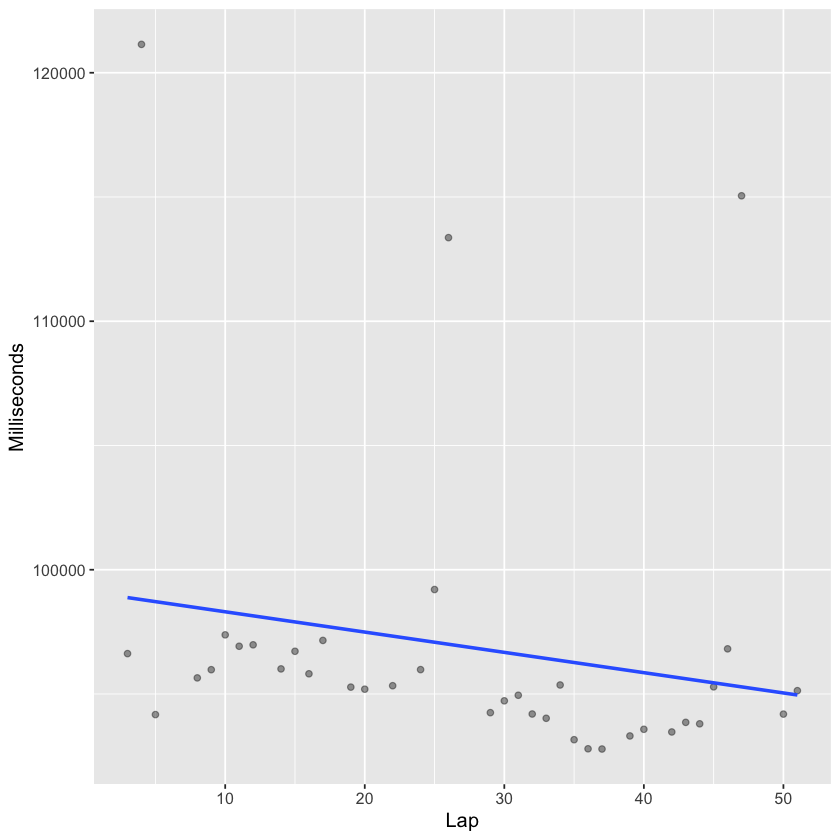

In [68]:
#18. Japan

cl_japan <- lec_laps %>%
                filter(raceId %in% japan_race_ID) 

cl_japan_clean <- cl_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 38)

cl_japan_clean_ID <- cl_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_japan_races <- lec_laps %>%
                    filter(raceId %in% cl_japan_clean_ID)

formulaone_split <- initial_split(cl_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse()

### GETS PREDICTION

get_japan_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5723654,95.39423,1.589904


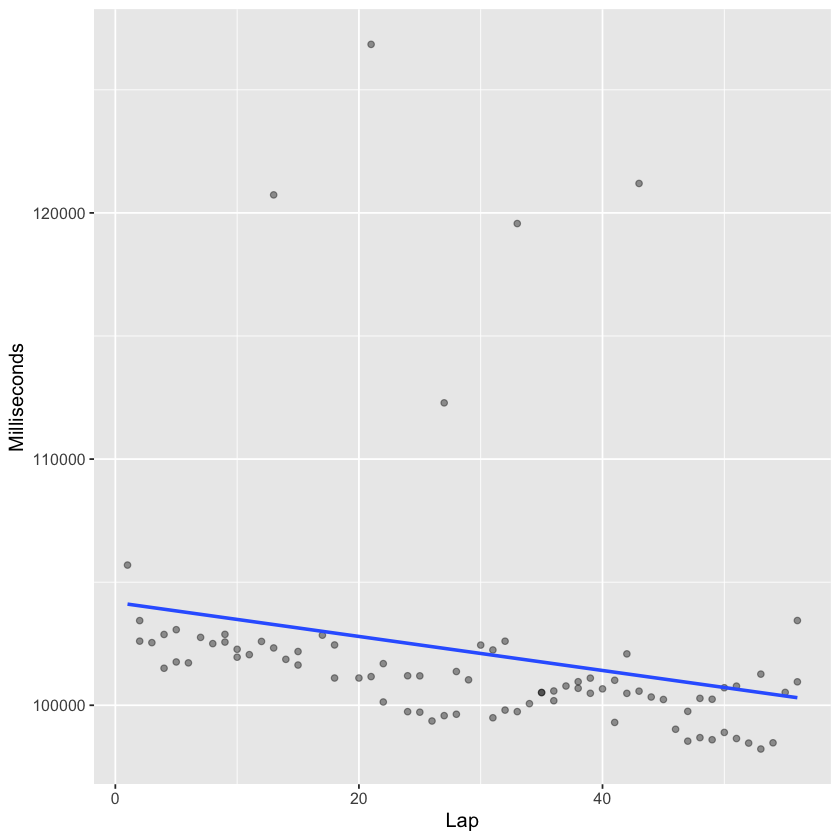

In [69]:
#19. USA, Austin

cl_austin <- lec_laps %>%
                filter(raceId %in% austin_race_ID) 

cl_austin_clean <- cl_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter( n!= 31)


cl_austin_clean_ID <- cl_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_austin_races <- lec_laps %>%
                    filter(raceId %in% cl_austin_clean_ID)

formulaone_split <- initial_split(cl_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse()

### GETS PREDICTION

get_austin_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5972936,99.54894,1.659149


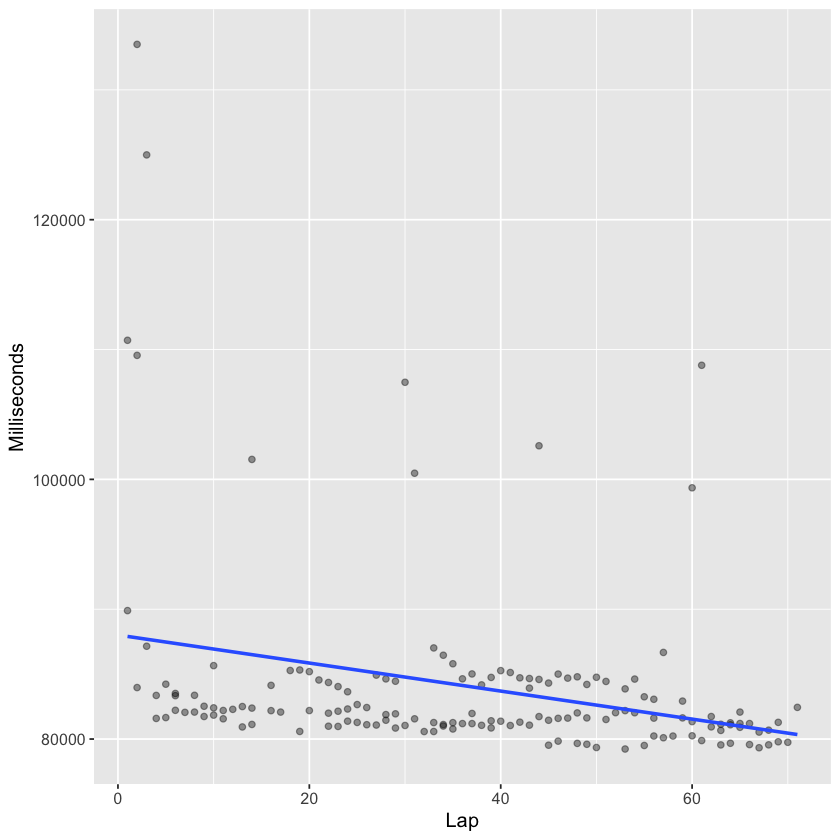

In [70]:
#20. Mexico

cl_mexico <- lec_laps %>%
                filter(raceId %in% mexico_race_ID) 

cl_mexico_clean <- cl_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_mexico_clean_ID <- cl_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_mexico_races <- lec_laps %>%
                    filter(raceId %in% cl_mexico_clean_ID)

formulaone_split <- initial_split(cl_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse()

### GETS PREDICTION

get_mexico_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5426072,90.43453,1.507242


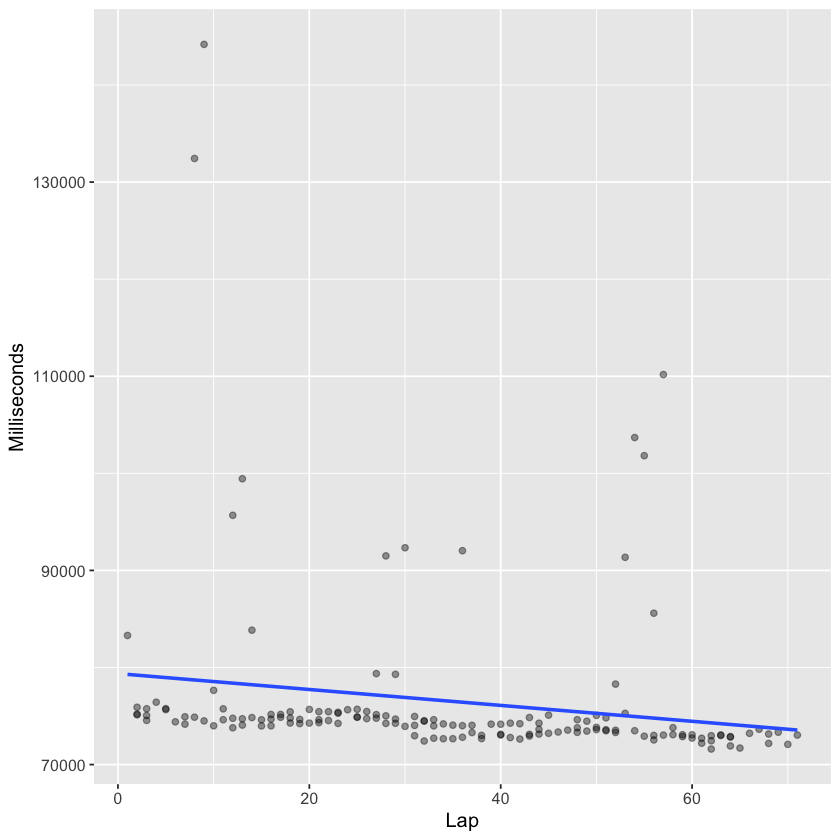

In [71]:
#21. Brazil

cl_brazil <- lec_laps %>%
                filter(raceId %in% brazil_race_ID) 

cl_brazil_clean <- cl_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_brazil_clean_ID <- cl_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_brazil_races <- lec_laps %>%
                    filter(raceId %in% cl_brazil_clean_ID)

formulaone_split <- initial_split(cl_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse()

### GETS PREDICTION

get_brazil_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6171970,102.8662,1.714436


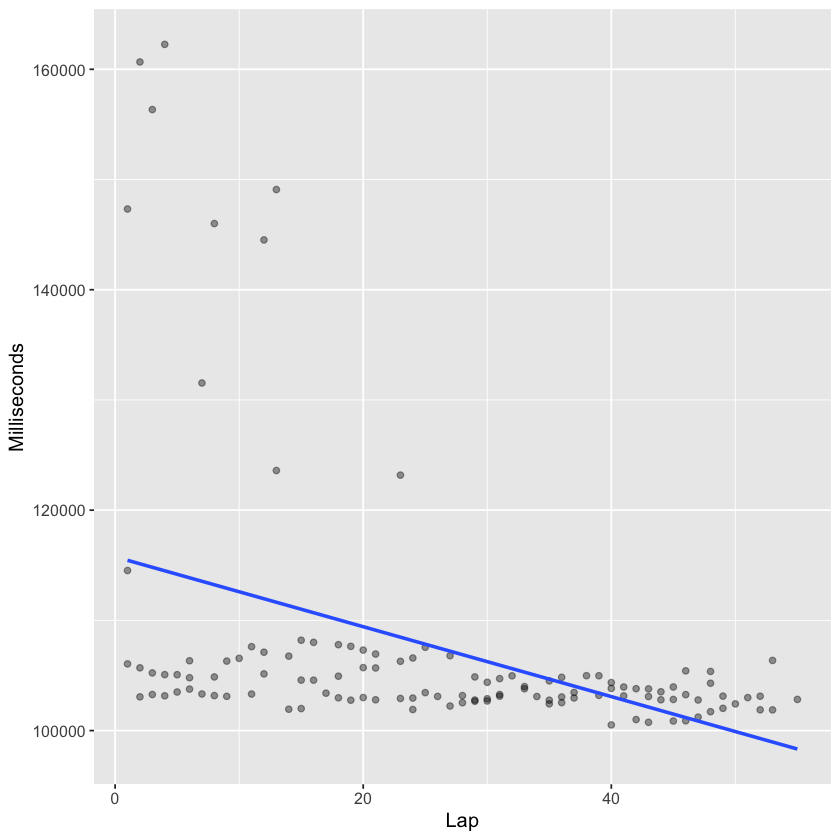

In [72]:
#22. UAE

cl_uae <- lec_laps %>%
                filter(raceId %in% uae_race_ID) 

cl_uae_clean <- cl_uae %>%
                        group_by(raceId) %>% 
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_uae_clean_ID <- cl_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_uae_races <- lec_laps %>%
                    filter(raceId %in% cl_uae_clean_ID)

formulaone_split <- initial_split(cl_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 


### GETS PREDICTION

get_uae_prediction()

# Collection

In [73]:
rmse_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,7681.120,1
rmse,standard,6237.458,2
rmse,standard,9003.637,3
rmse,standard,23461.225,4
rmse,standard,7922.555,5
rmse,standard,10346.436,6
rmse,standard,1359.757,7
rmse,standard,21001.450,8
rmse,standard,4250.040,9
